In [22]:
# Dataset 
#Task 1: Classify Study Time
time_data = [
    (3.5, 2.0, 7.0), (5.0, 1.5, 6.5), (2.5, 3.0, 8.0),
    (4.0, 2.0, 6.0), (1.5, 4.5, 9.0), (3.0, 2.5, 7.5),
    (5.5, 1.0, 6.0), (2.0, 3.5, 8.5), (4.5, 2.0, 7.0),
    (3.0, 3.0, 7.5), (6.0, 1.5, 6.0), (2.5, 4.0, 8.0),
    (4.0, 2.5, 7.0), (5.0, 2.0, 6.5), (3.5, 2.5, 7.0)
]
low = []
moderate = []
high = []

for study, entertainment, sleep in time_data:
    if study < 3:
        low.append(study)
    elif 3 <= study <= 5:
        moderate.append(study)
    else:
        high.append(study)

print("Low study hours:", low)
print("Moderate study hours:", moderate)
print("High study hours:", high)


Low study hours: [2.5, 1.5, 2.0, 2.5]
Moderate study hours: [3.5, 5.0, 4.0, 3.0, 4.5, 3.0, 4.0, 5.0, 3.5]
High study hours: [5.5, 6.0]


In [23]:
#Task 2: Count Days
print("Days with low study time:", len(low))
print("Days with moderate study time:", len(moderate))
print("Days with high study time:", len(high))


Days with low study time: 4
Days with moderate study time: 9
Days with high study time: 2


In [24]:
#Task 3: Convert Study Hours to Minutes
time_data = [
    (3.5, 2.0, 7.0), (5.0, 1.5, 6.5), (2.5, 3.0, 8.0),
    (4.0, 2.0, 6.0), (1.5, 4.5, 9.0), (3.0, 2.5, 7.5),
    (5.5, 1.0, 6.0), (2.0, 3.5, 8.5), (4.5, 2.0, 7.0),
    (3.0, 3.0, 7.5), (6.0, 1.5, 6.0), (2.5, 4.0, 8.0),
    (4.0, 2.5, 7.0), (5.0, 2.0, 6.5), (3.5, 2.5, 7.0)
]
study_minutes = []

for study, entertainment, sleep in time_data:
    study_minutes.append(study * 60)

print("Study time in minutes:", study_minutes)


Study time in minutes: [210.0, 300.0, 150.0, 240.0, 90.0, 180.0, 330.0, 120.0, 270.0, 180.0, 360.0, 150.0, 240.0, 300.0, 210.0]


In [25]:
#Task 4: Analyze Average Time Use
study_hours = []
entertainment_hours = []
sleep_hours = []

for s, e, sl in time_data:
    study_hours.append(s)
    entertainment_hours.append(e)
    sleep_hours.append(sl)

avg_study = sum(study_hours) / len(study_hours)
avg_ent = sum(entertainment_hours) / len(entertainment_hours)
avg_sleep = sum(sleep_hours) / len(sleep_hours)

print("Average Study Hours:", round(avg_study, 2))
print("Average Entertainment Hours:", round(avg_ent, 2))
print("Average Sleep Hours:", round(avg_sleep, 2))


Average Study Hours: 3.7
Average Entertainment Hours: 2.5
Average Sleep Hours: 7.17


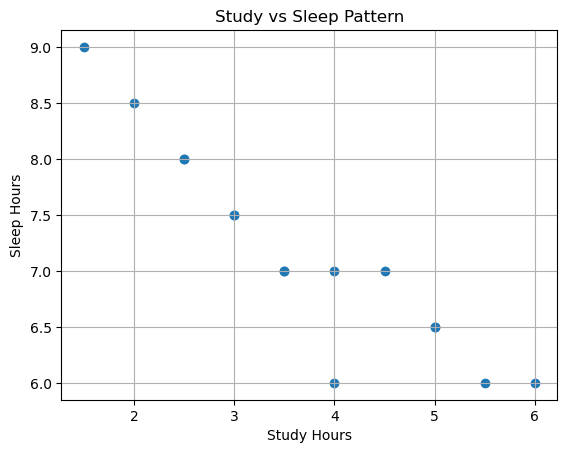

In [26]:
#Task 5: Visualization – Study vs Sleep
import matplotlib.pyplot as plt

study_hours = [x[0] for x in time_data]
sleep_hours = [x[2] for x in time_data]

plt.scatter(study_hours, sleep_hours)
plt.xlabel("Study Hours")
plt.ylabel("Sleep Hours")
plt.title("Study vs Sleep Pattern")
plt.grid(True)
plt.show()


In [16]:
#SECTION 8 — RECURSION PROBLEMS
#Task 1 — Sum of Nested Lists
def sum_nested_list(nested_list):
    total = 0
    for element in nested_list:
        if isinstance(element, list):
            total += sum_nested_list(element)
        else:
            total += element
    return total

# Test
nested_list = [1, [2, [3, 4], 5], 6, [7, 8]]
print("Sum of nested list:", sum_nested_list(nested_list))


Sum of nested list: 36


In [17]:
#Task 2 — Generate All Permutations
def generate_permutations(s):
    if len(s) == 1:
        return [s]

    perms = []
    for i in range(len(s)):
        char = s[i]
        remaining = s[:i] + s[i+1:]
        for p in generate_permutations(remaining):
            perms.append(char + p)
    return list(set(perms))  # unique permutations

print(generate_permutations("abc"))
print(generate_permutations("aab"))


['cba', 'acb', 'abc', 'bca', 'bac', 'cab']
['aba', 'aab', 'baa']


In [18]:
#Task 3 — Directory Size
def calculate_directory_size(directory):
    total = 0
    for key, value in directory.items():
        if isinstance(value, dict): 
            total += calculate_directory_size(value)
        else:
            total += value
    return total

# Test
directory_structure = {
    "file1.txt": 200,
    "file2.txt": 300,
    "subdir1": {
        "file3.txt": 400,
        "file4.txt": 100
    },
    "subdir2": {
        "subsubdir1": {
            "file5.txt": 250
        },
        "file6.txt": 150
    }
}

print("Total directory size:", calculate_directory_size(directory_structure), "KB")


Total directory size: 1400 KB


In [19]:
#SECTION 8 — DYNAMIC PROGRAMMING
#Task 1 — Coin Change
def min_coins(coins, amount):
    dp = [float('inf')] * (amount + 1)
    dp[0] = 0

    for coin in coins:
        for i in range(coin, amount + 1):
            dp[i] = min(dp[i], dp[i - coin] + 1)

    return dp[amount] if dp[amount] != float('inf') else -1

print(min_coins([1, 2, 5], 11))


3


In [20]:
#Task 2 — Longest Common Subsequence
def longest_common_subsequence(s1, s2):
    n, m = len(s1), len(s2)
    dp = [[0] * (m + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if s1[i-1] == s2[j-1]:
                dp[i][j] = 1 + dp[i-1][j-1]
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])

    return dp[n][m]

print(longest_common_subsequence("abcde", "ace"))


3


In [21]:
#Task 3 — 0/1 Knapsack
def knapsack(weights, values, capacity):
    n = len(weights)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(1, capacity + 1):
            if weights[i-1] <= w:
                dp[i][w] = max(values[i-1] + dp[i-1][w - weights[i-1]], 
                               dp[i-1][w])
            else:
                dp[i][w] = dp[i-1][w]

    return dp[n][capacity]

print(knapsack([1, 3, 4, 5], [1, 4, 5, 7], 7))


9
